In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [34]:
import music21 as m2
import copy
def play(x):
    """Returns nothing. Outputs a midi realization of x, a note or stream.
    Primarily for use in notebooks and web environments.
    """
    s = m2.stream.Stream()
    s.append(m2.note.Rest())
    s.append(x)
    s.show('midi')

from itertools import product
import random

<module 'music21.note' from '/Users/esparami/anaconda3/lib/python3.7/site-packages/music21/note.py'>

'C'

<music21.pitch.Pitch C>

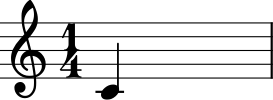

False

In [36]:
m2.note
c = m2.note.Note('C')
c.name
c.octave
c.pitch
c.show()
c.octave == 4
play(c)

In [42]:
bflat = m2.note.Note("B-2")
bflat.transpose('M3')
bflat.transpose('P4', inPlace=True)
bflat

<music21.note.Note D>

<music21.note.Note E->

In [45]:
m2.note.Note()

<music21.note.Note C>

In [49]:
a = m2.pitch.Pitch('b-4')
halfDuration = m2.duration.Duration('half')

<music21.pitch.Pitch C4>

<music21.duration.Duration 1.0>

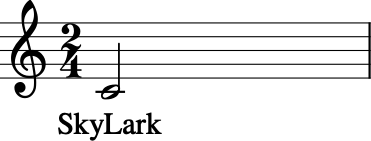

In [58]:
a = m2.note.Note()
a.lyric='SkyLark'
a.pitch
a.duration
a.quarterLength = 2
a.show()

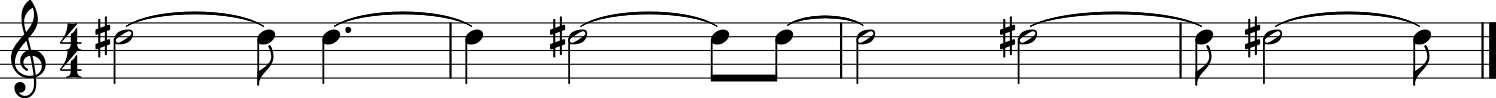

In [68]:
stream2 = m2.stream.Stream()
n3 = m2.note.Note('D#5')# octave values can be included in creation arguments
n3.duration.quarterLength = 2.5
stream2.repeatAppend(n3, 6)
stream2.show()
play(stream2)

In [74]:
note1 = m2.note.Note("C4")
note1.duration.type = 'half'
note2 = m2.note.Note("F#4")
note2.duration.quarterLength = 1.5
note3 = m2.note.Note("B-2")
note3.duration.type = 'whole'

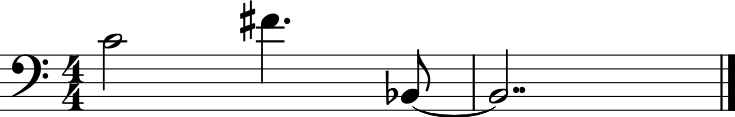

In [76]:
s1 = m2.stream.Stream()
s1.append(note1)
s1.append(note2)
s1.append(note3)
s1.show()

In [90]:
for note in s1.getElementsByClass(m2.note.Note):
    note.name
    note.offset
s1.getElementsByClass(m2.note.Note).stream().show('text')
s1.getElementsByOffset(3)
s1.analyze('ambitus')

'C'

0.0

'F#'

2.0

'B-'

3.5

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.5} <music21.note.Note B->


<music21.stream.iterator.StreamIterator for Stream:0xa164695c0 @:0>

<music21.interval.Interval A12>

In [92]:
from music21 import *

note1 = note.Note("C4")
note1.duration.type = 'half'
note2 = note.Note("F#4")
note3 = note.Note("B-2")

stream1 = stream.Stream()
stream1.id = 'some notes'
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.append(stream1)

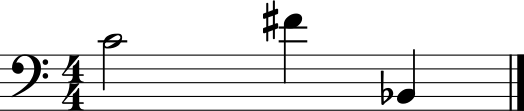

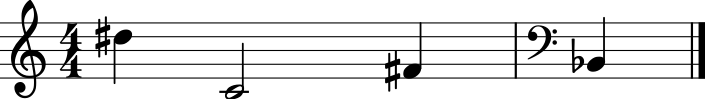

In [94]:
stream1.show()
biggerStream.show()

In [95]:
help(note.Note)

Help on class Note in module music21.note:

class Note(NotRest)
 |  Note(pitchName=None, **keywords)
 |  
 |  One of the most important music21 classes, a Note
 |  stores a single note (that is, not a rest or an unpitched element)
 |  that can be represented by one or more notational units -- so
 |  for instance a C quarter-note and a D# eighth-tied-to-32nd are both
 |  a single Note object.
 |  
 |  
 |  A Note knows both its total duration and how to express itself as a set of
 |  tied notes of different lengths. For instance, a note of 2.5 quarters in
 |  length could be half tied to eighth or dotted quarter tied to quarter.
 |  
 |  
 |  The first argument to the Note is the pitch name (with or without
 |  octave, see the introduction to :class:`music21.pitch.Pitch`).
 |  Further arguments can be specified as keywords (such as type, dots, etc.)
 |  and are passed to the underlying :class:`music21.duration.Duration` element.
 |  
 |  
 |  Two notes are considered equal if their most

In [96]:
sBach = corpus.parse('bach/bwv57.8')

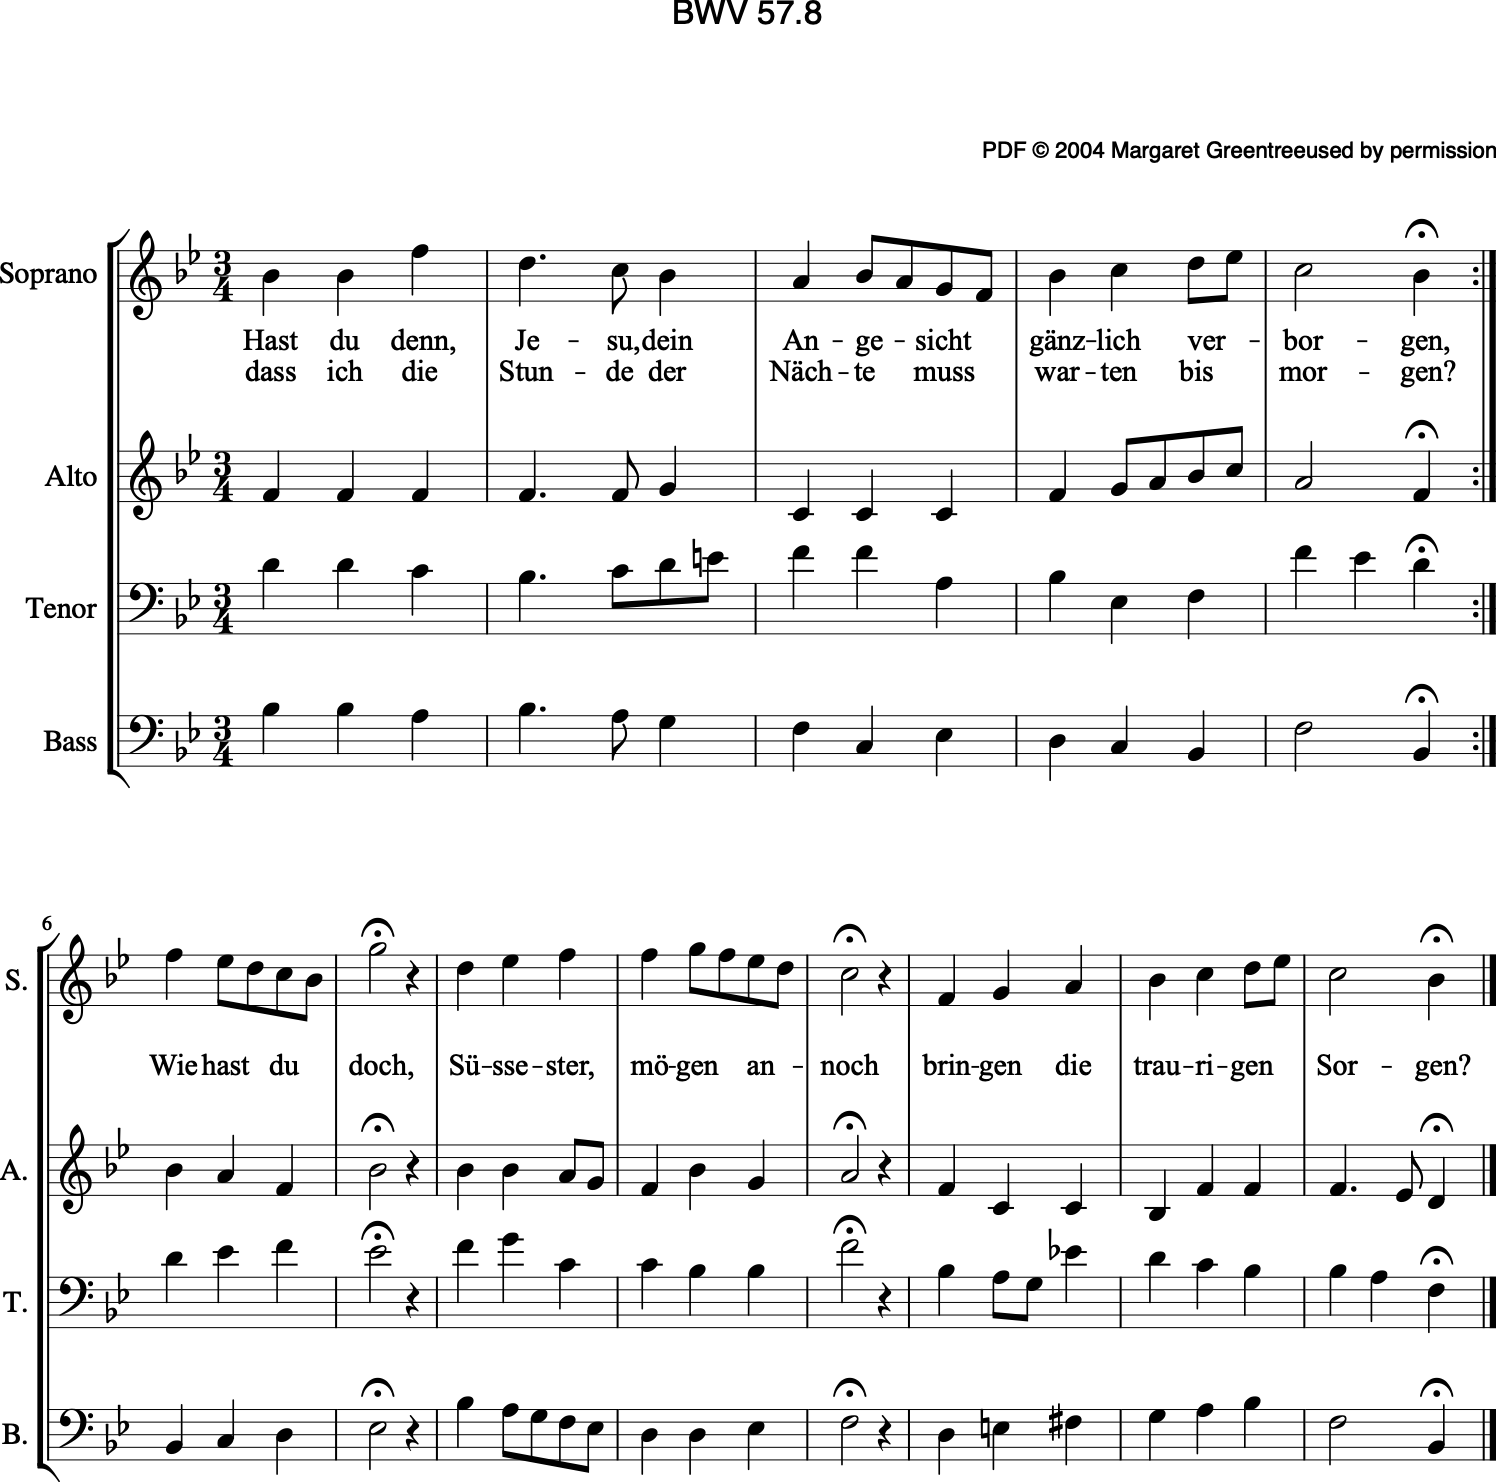

In [97]:
sBach.show()

In [98]:
play(sBach)

In [99]:
alto = sBach.parts[1]

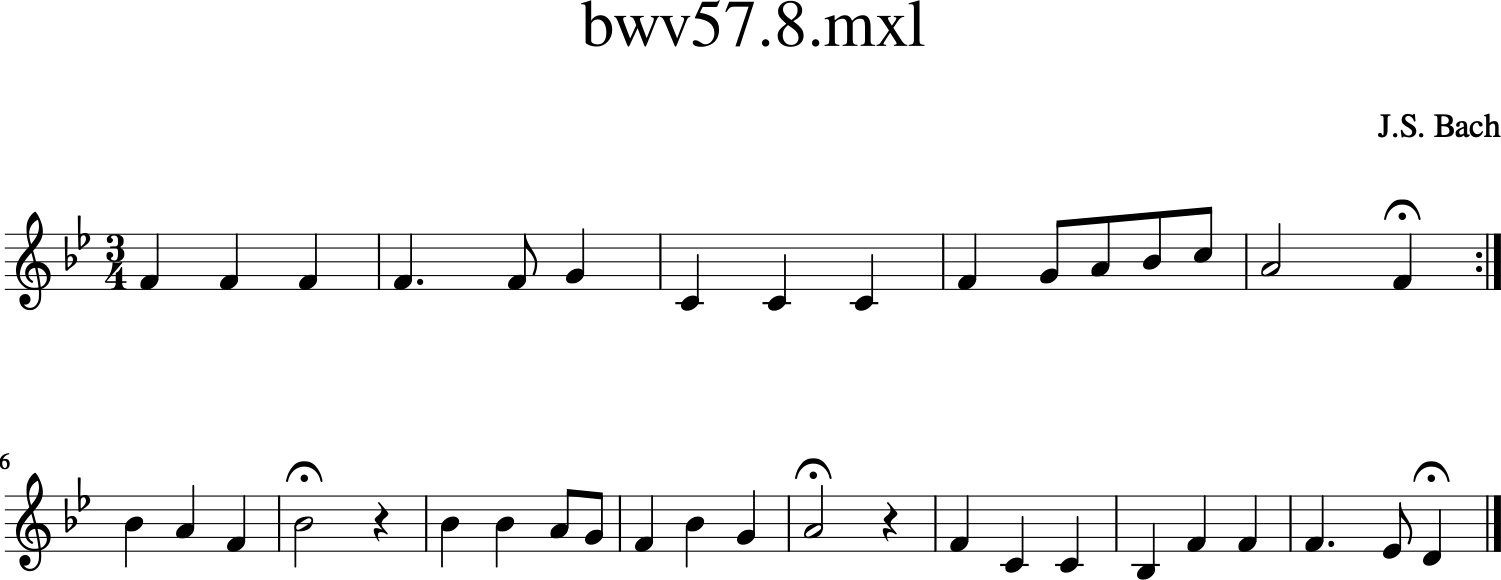

In [101]:
alto.show()
play(alto)

In [102]:
from music21 import *
cMinor = chord.Chord(["C4","G4","E-5"])

In [104]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

In [105]:
cMajor = chord.Chord(["E3","C4","G4"])
cMajor.inversion()


1

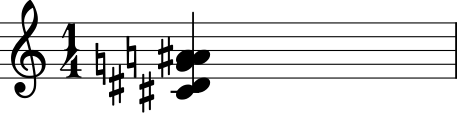

In [106]:
oddChord = chord.Chord([1, 3, 7, 9, 10])
oddChord.show()

In [107]:
play(oddChord)

In [108]:
o = corpus.parse('josquin/milleRegrets')

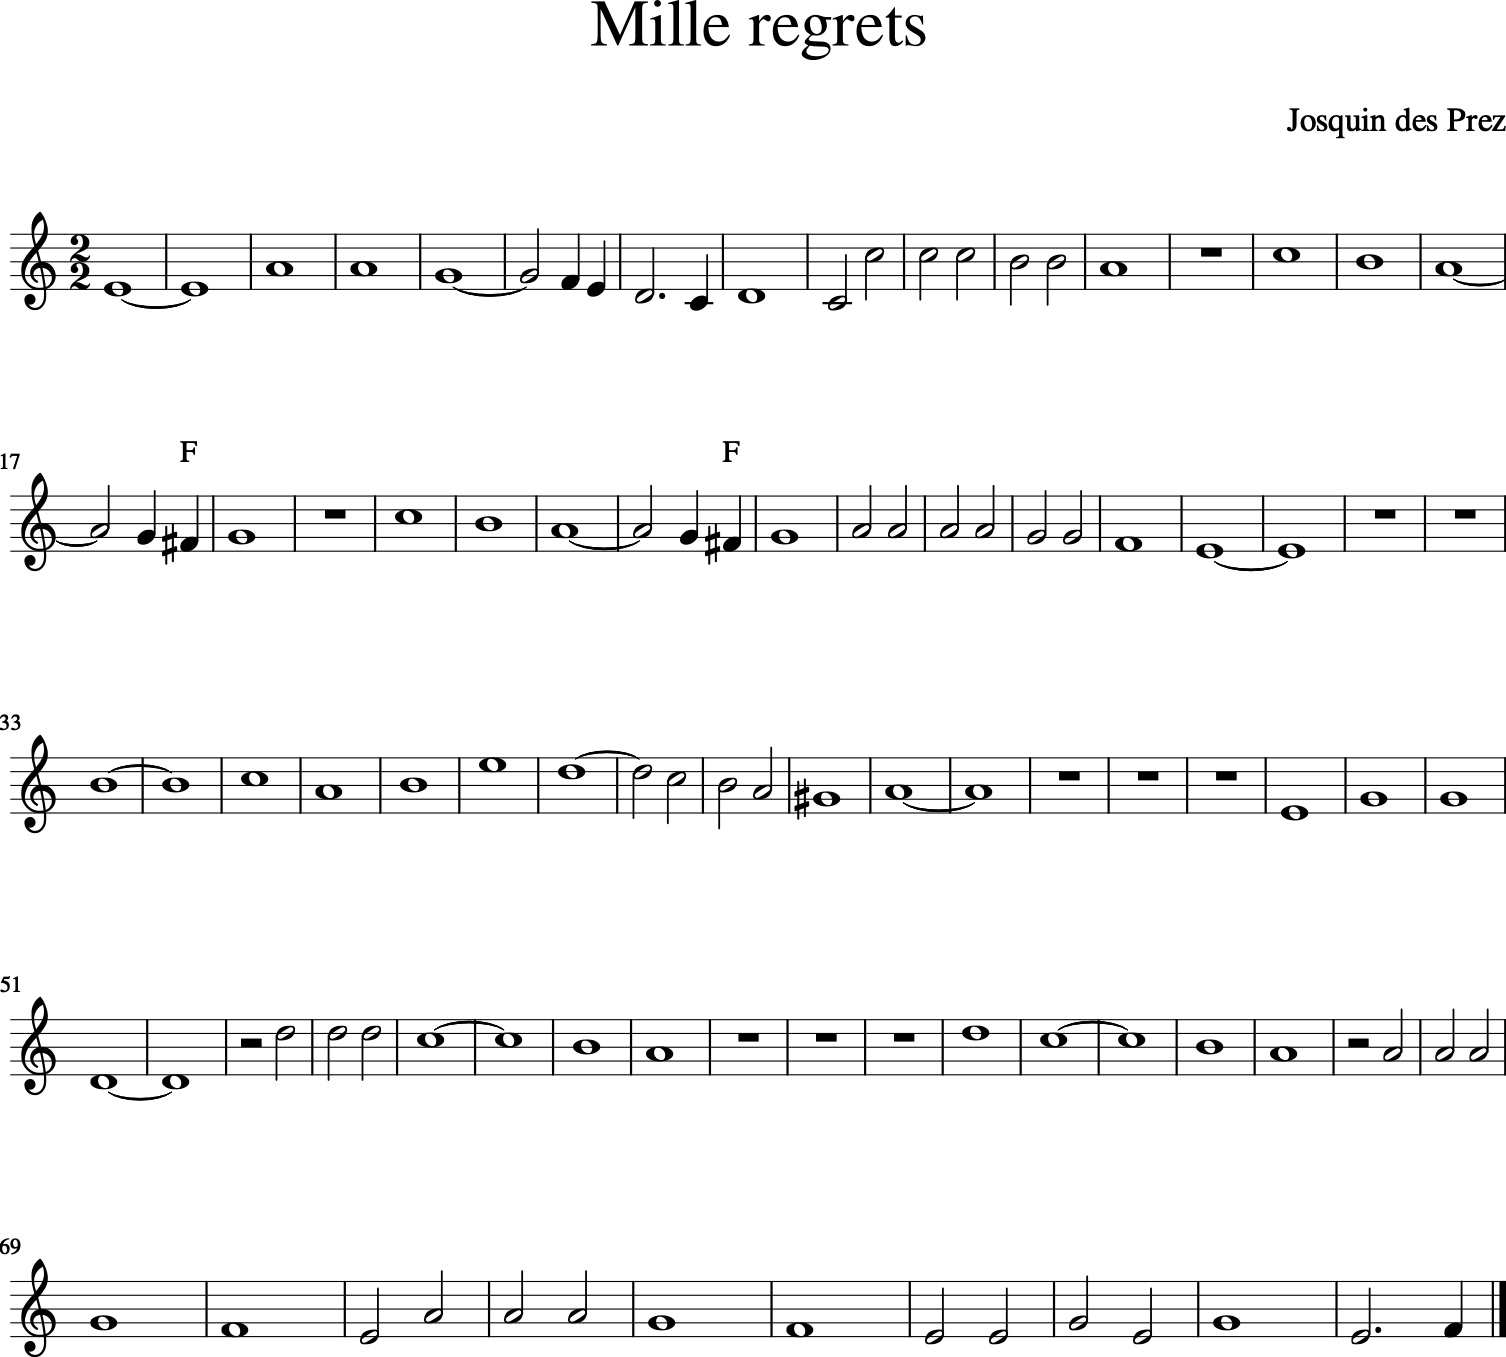

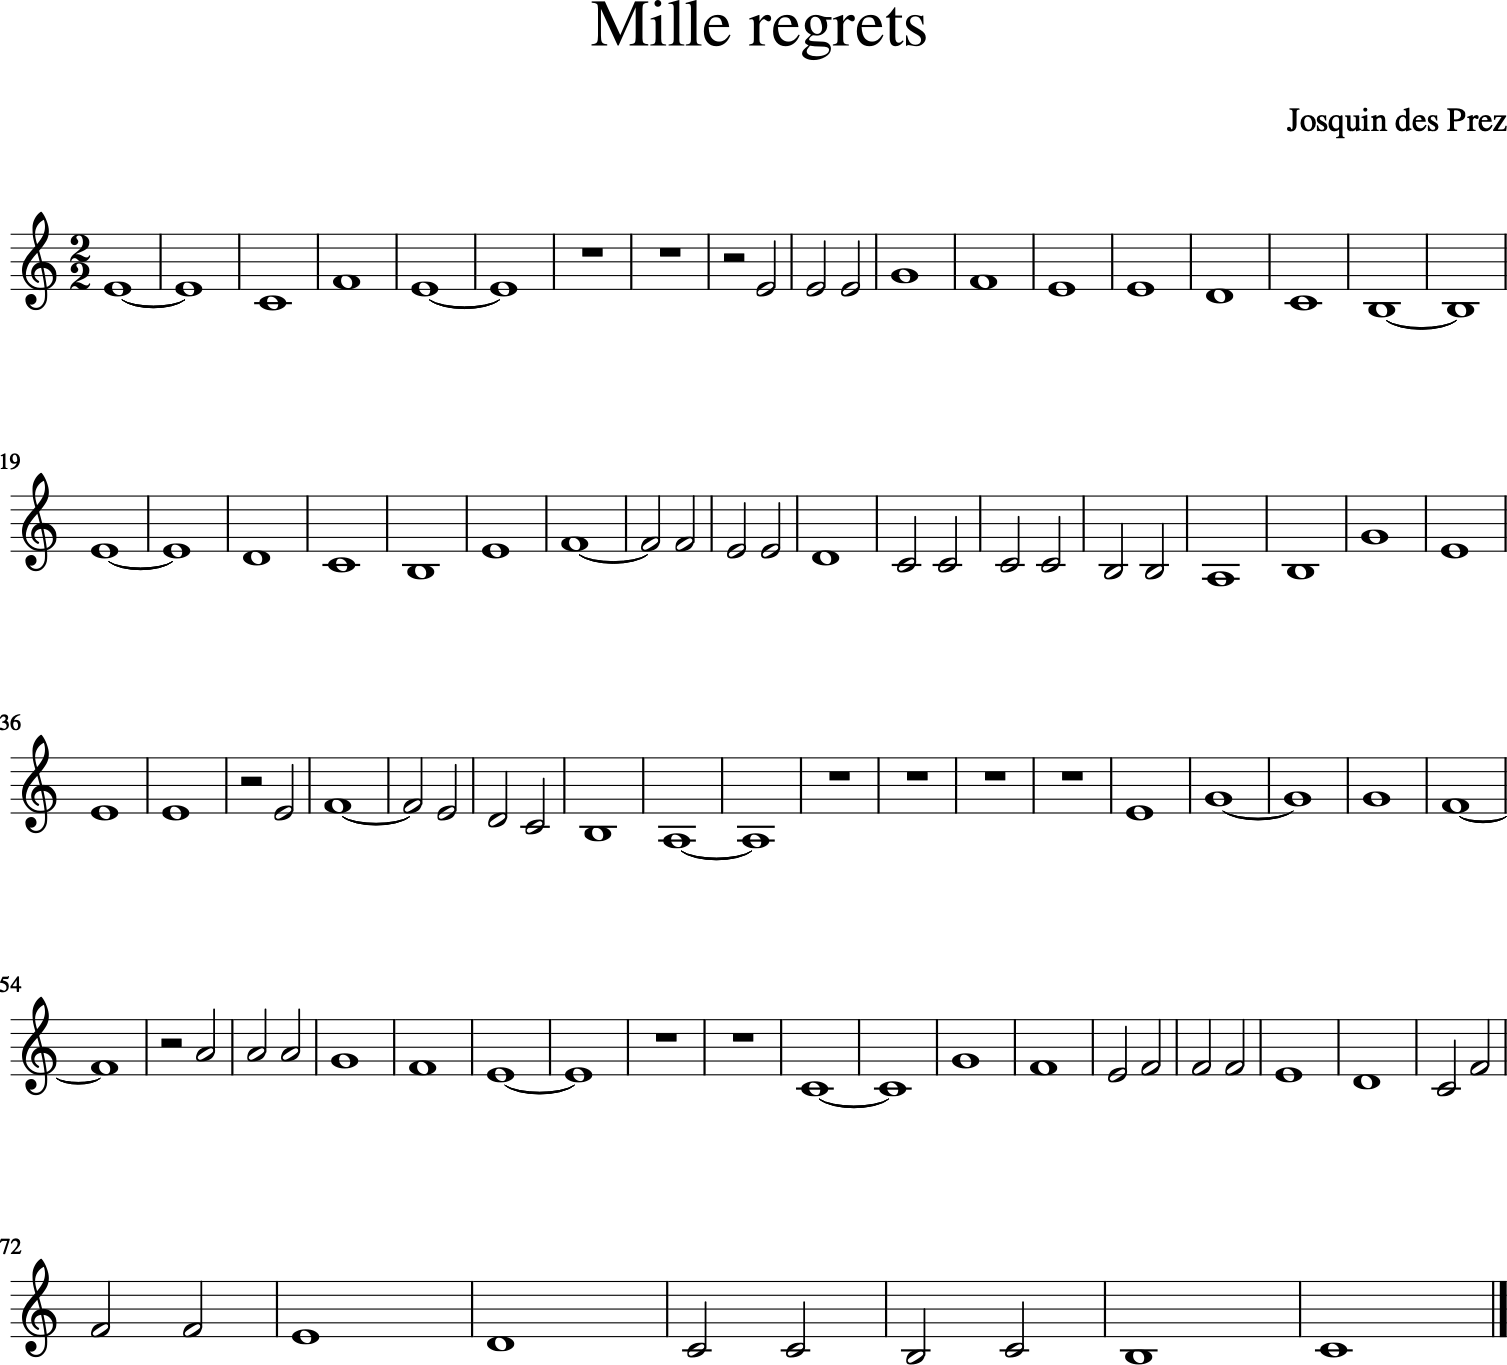

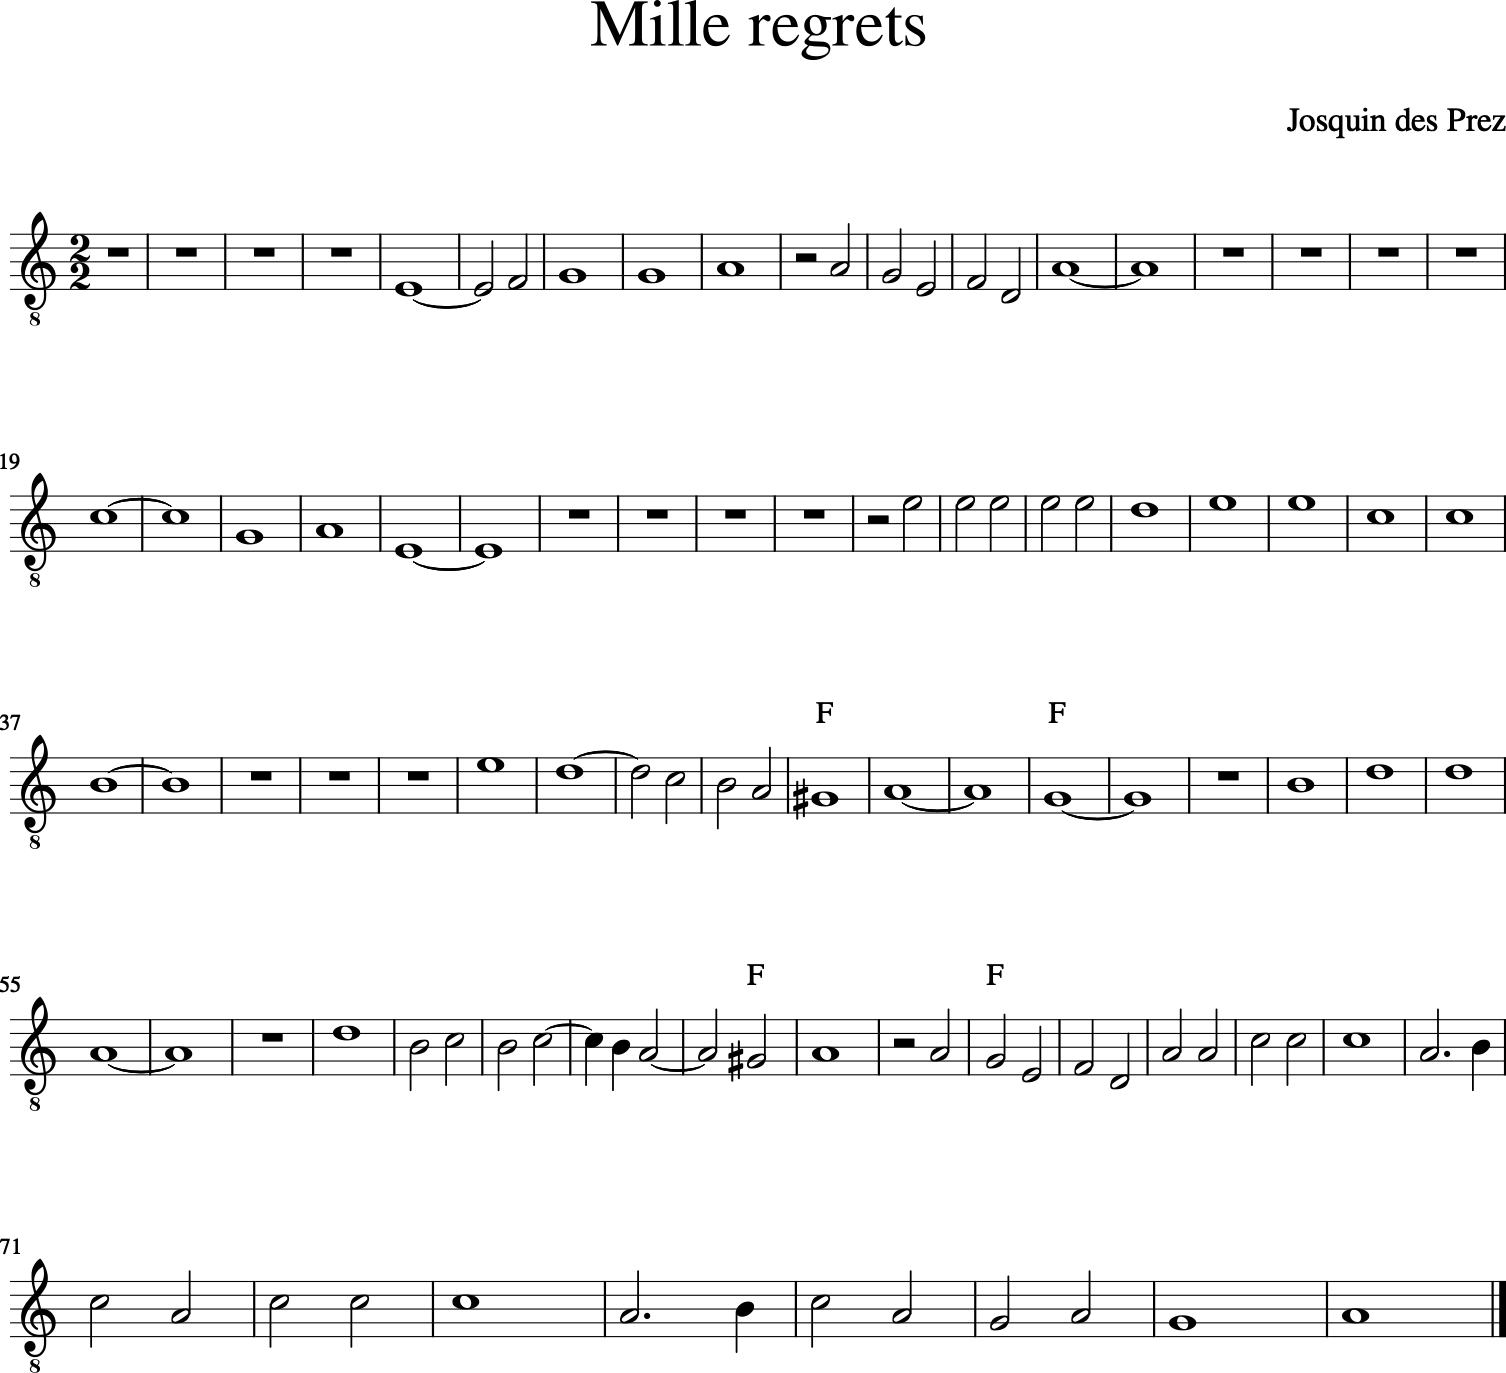

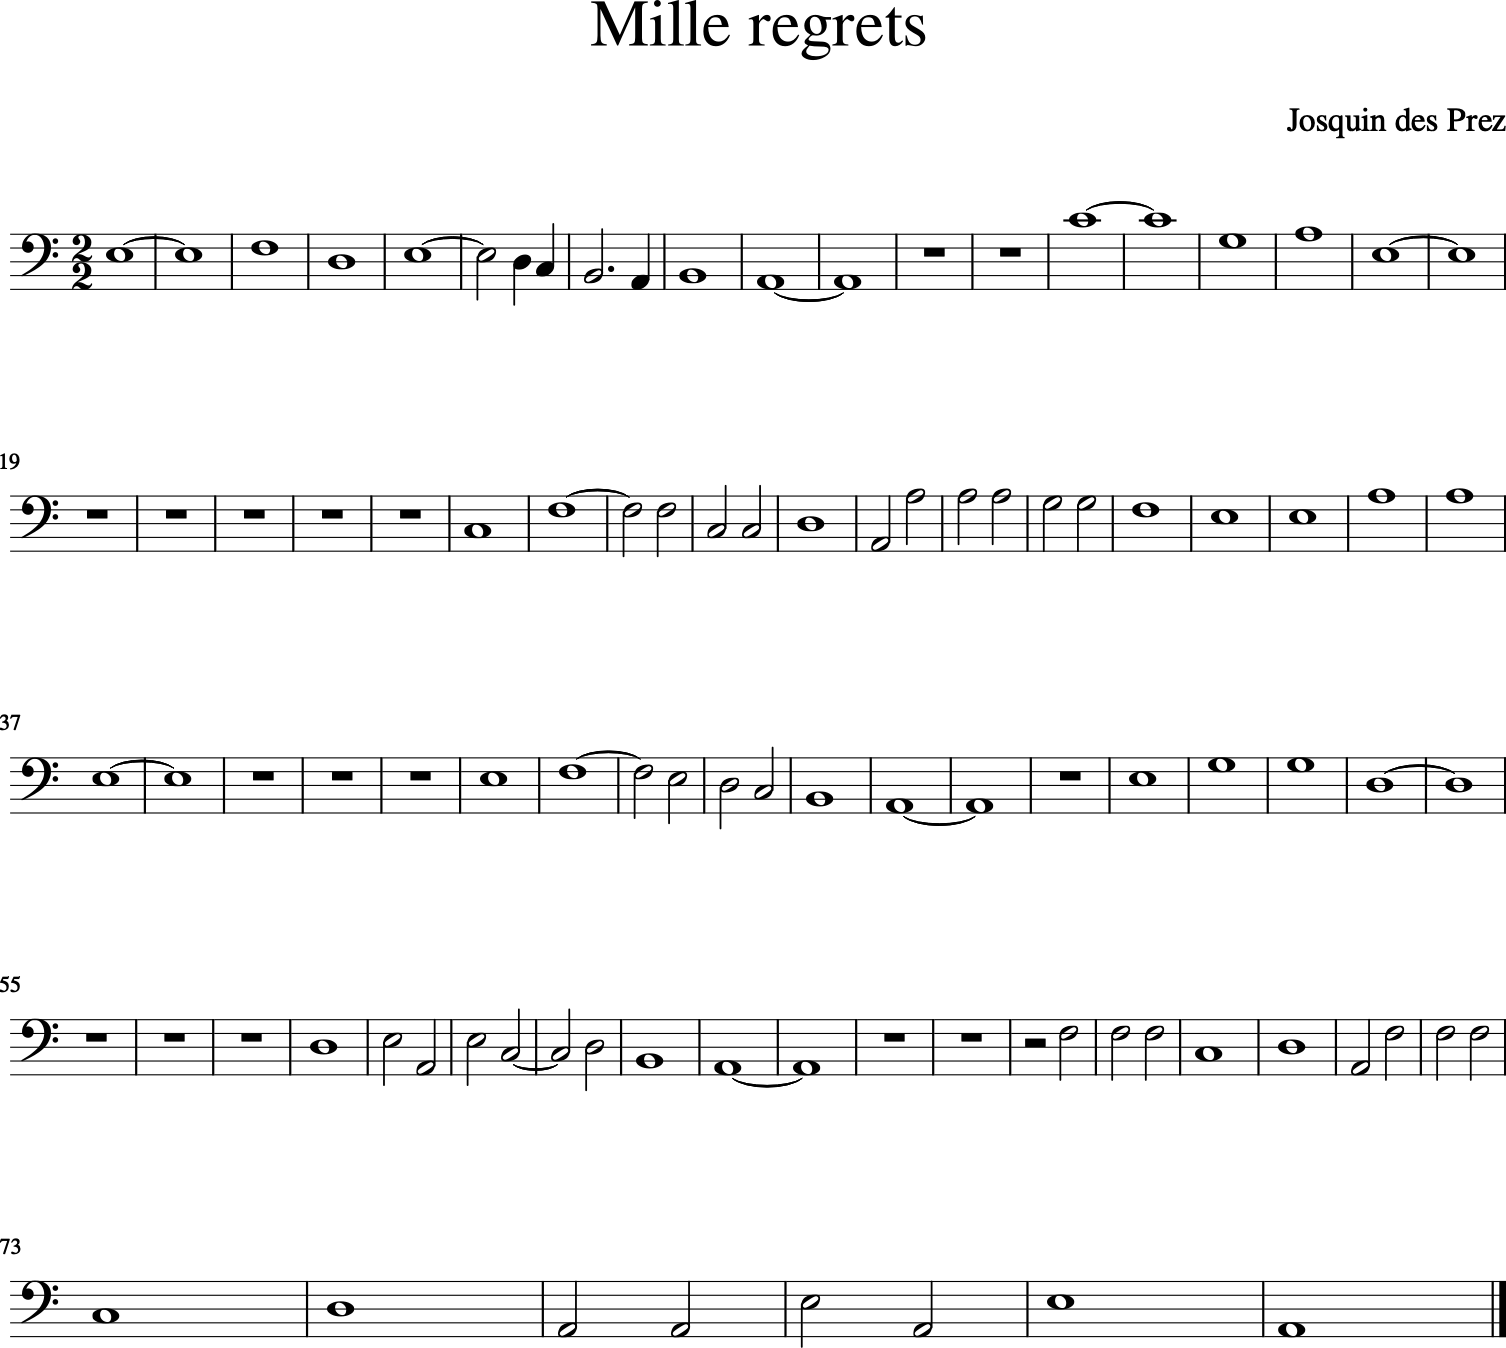

In [110]:
o.show()
play(o)

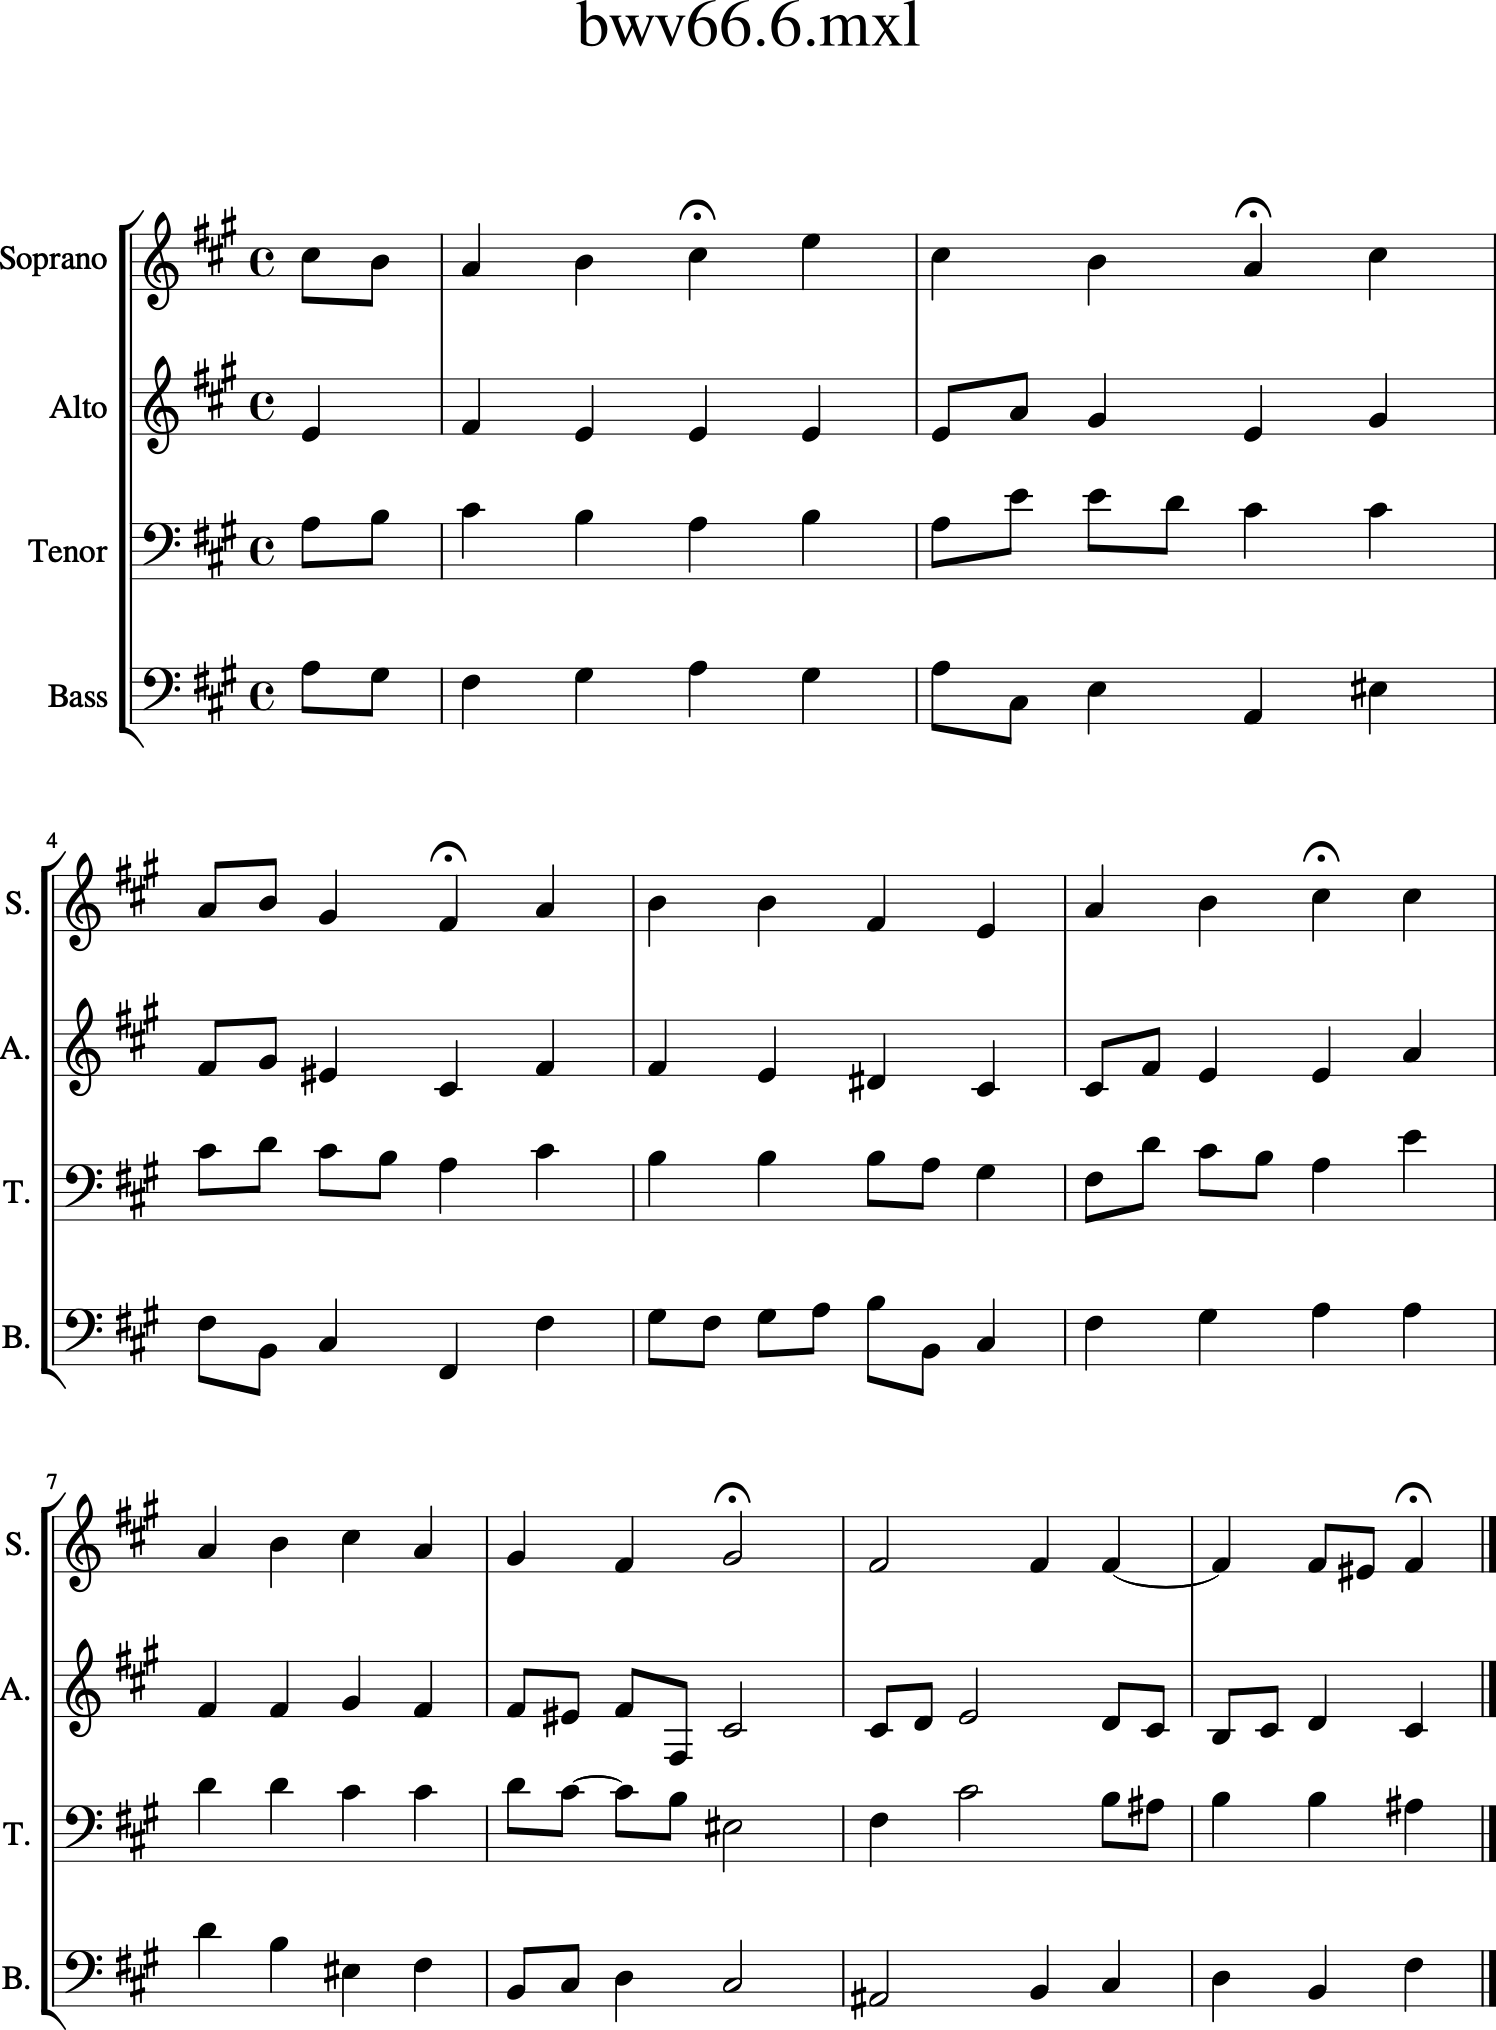

In [111]:
b = corpus.parse('bwv66.6')
b.show()

<music21.stream.Part Soprano>

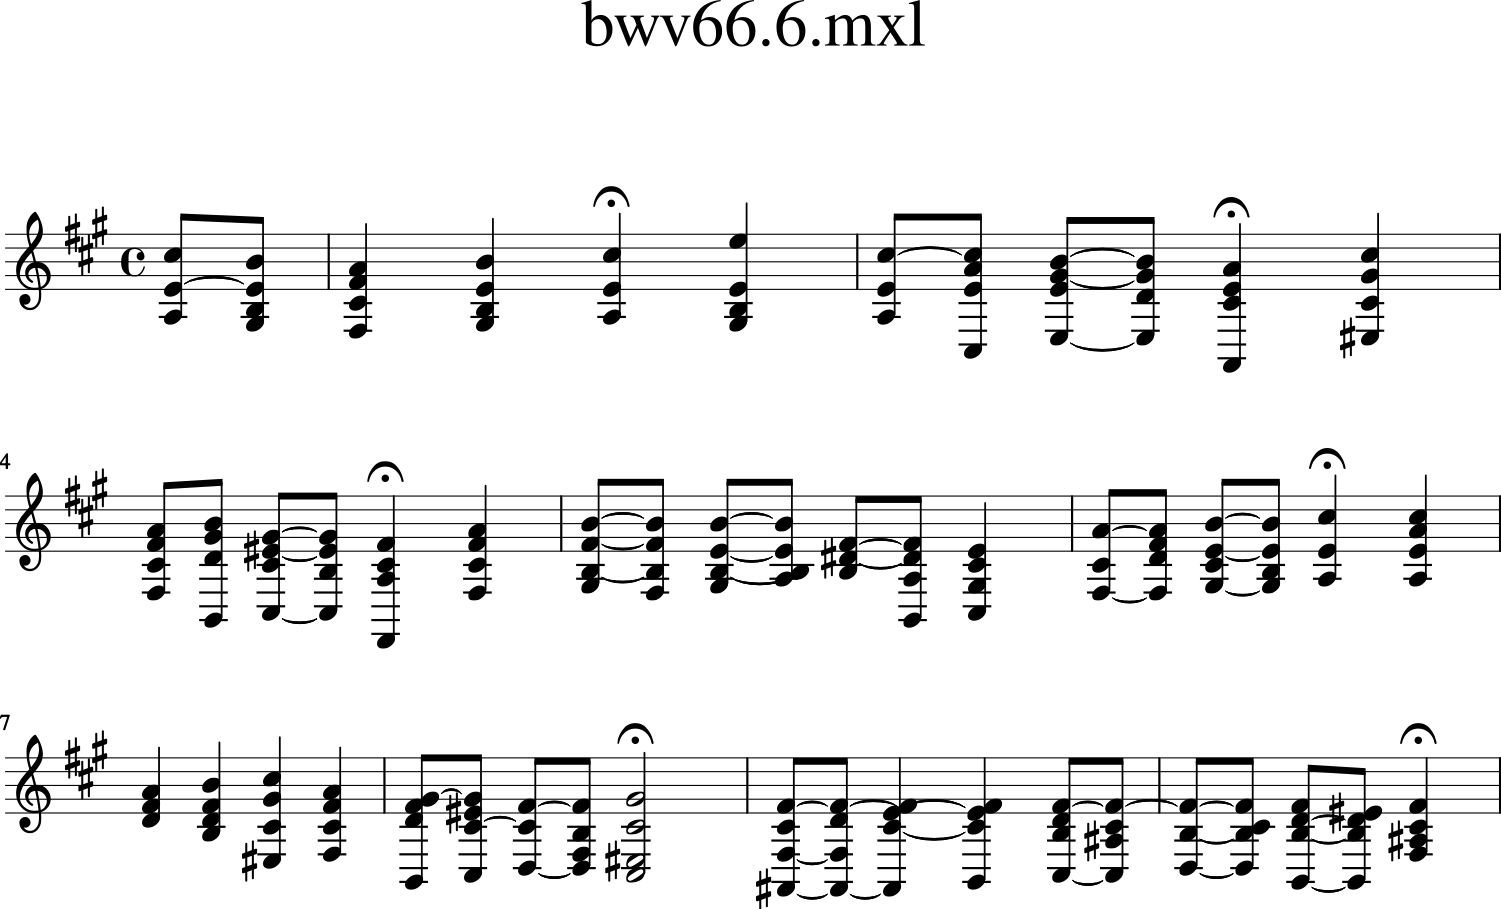

In [118]:
bChords = b.chordify()
bChords
bChords.show()

In [119]:
play(bChords)

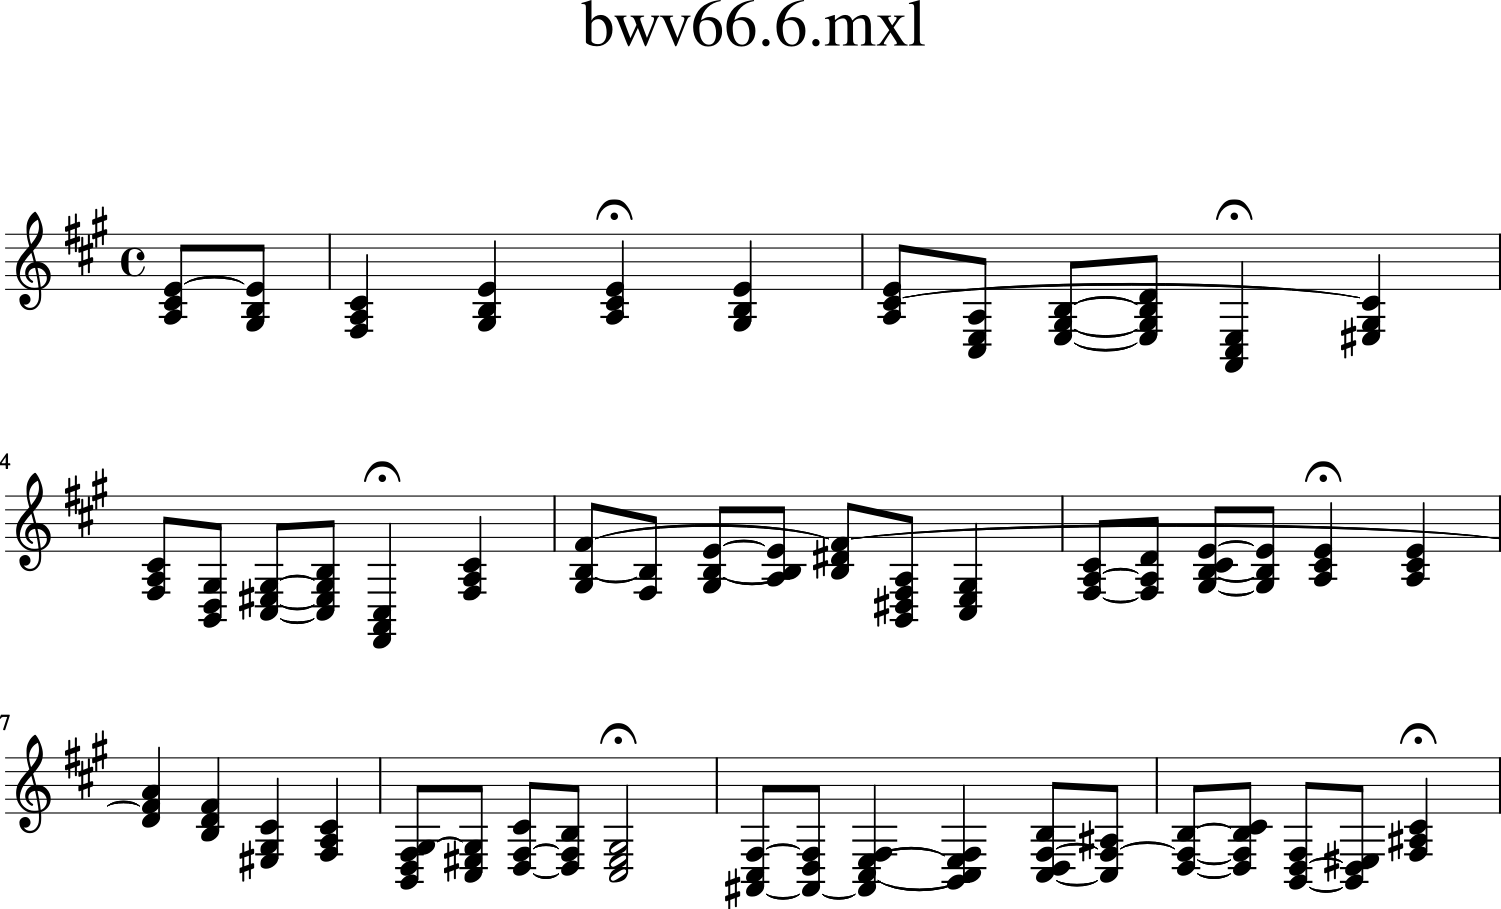

In [133]:
for stream in bChords.getElementsByClass(m2.stream.Stream):
    for chord in stream.getElementsByClass(m2.chord.Chord):
        chord.closedPosition(inPlace=True)
bChords.show()
play(bChords)

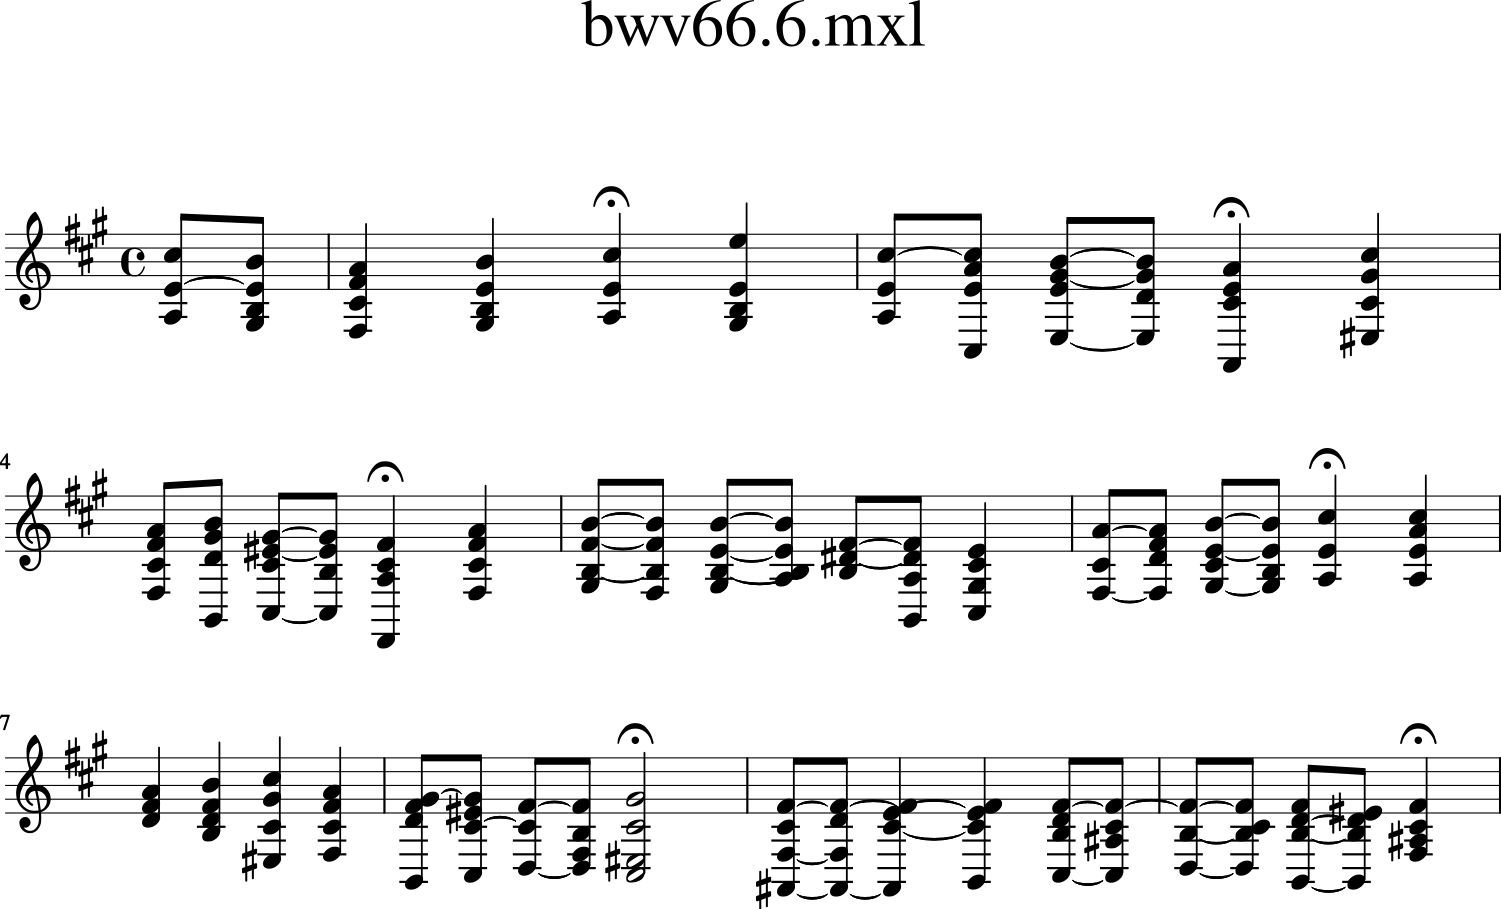

In [135]:
s = corpus.parse('bwv66.6')
sChords = s.chordify()
sChords.show()

In [143]:
displayPart = m2.stream.Part(id='displayPart')
displayPart
sOnlyChords = sChords.flat.getElementsByClass('Chord')

<music21.stream.Part displayPart>

In [151]:
def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = m2.stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

In [152]:
for i in range(0, len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)

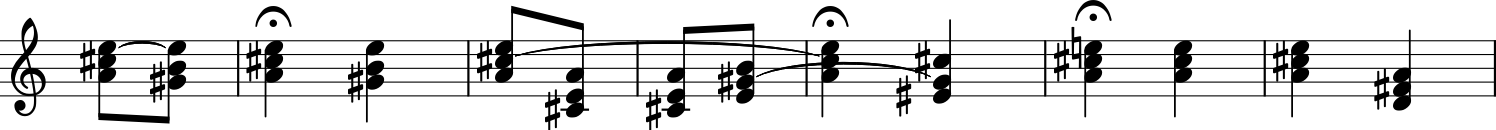

In [154]:
displayPart.show()

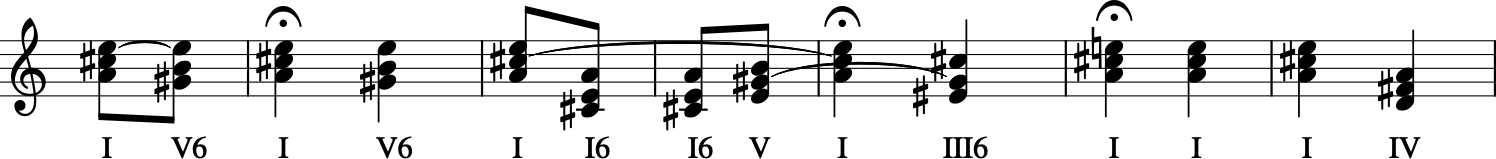

In [155]:
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show()

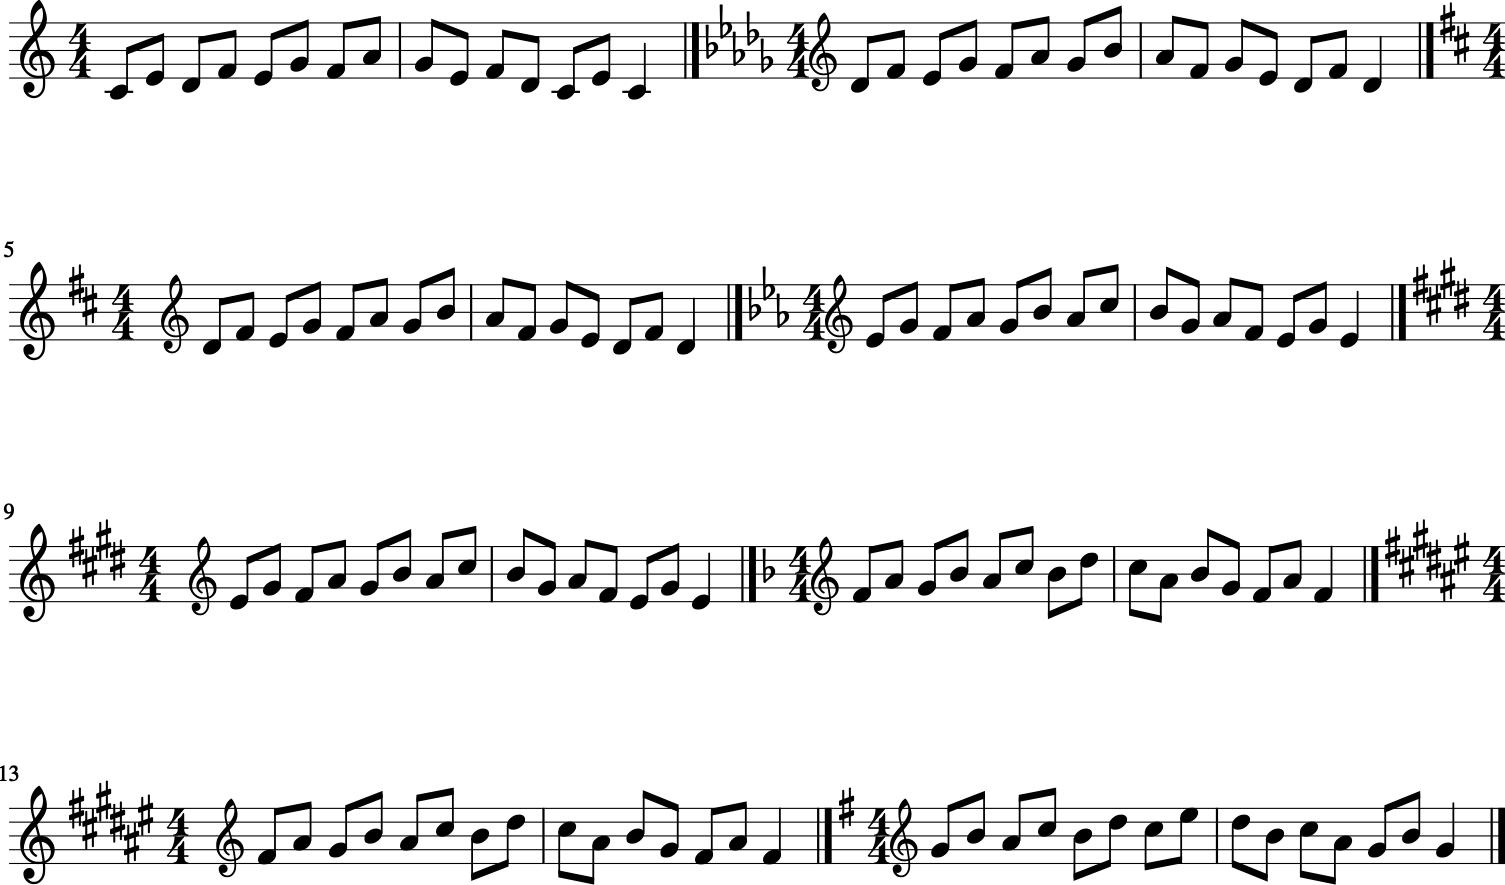

In [158]:
out = m2.stream.Part()
for i in range(0, 8):
    pitchStream = converter.parse("tinyNotation: 4/4 c8 e d f e g f a g e f d c e c4")
    k = key.Key('C')
    pitchStream.measure(1).insert(0, k)
    k.transpose(i, inPlace=True)
    for n in pitchStream.recurse().notes:
        n.transpose(i, inPlace=True)
    for m in pitchStream:
        out.append(m)
out.show()

In [159]:
play(out)

In [ ]:
converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#").show()

In [ ]:
print (serial.rowToMatrix([2,1,9,10,5,3,4,0,8,7,6,11]) )

In [ ]:
print (serial.getHistoricalRowByName('RowSchoenbergOp37').matrix() )

In [ ]:
n = note.Note("D#4")
n.duration.type = 'half'
dir(n)
n.show()

In [ ]:
littleMelody = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
littleMelody.show()

In [ ]:
littleMelody.show('midi')

In [ ]:
s = corpus.parse('bach/bwv108.6.xml')

In [ ]:
paths = corpus.getComposer('airdsAirs')

In [ ]:
paths = corpus.getComposer('beethoven')

In [ ]:
paths

In [ ]:
from pathlib import Path
a = Path('/Users/esparami/anaconda3/lib/python3.7/site-packages/music21/corpus/beethoven/opus74.mxl')

In [ ]:
ah = m2.converter.parse(a)

In [ ]:
ah.show()

In [ ]:
ah.getInstruments

In [ ]:
ah.show('midi')

In [30]:
note1 = m2.note.Note("C4")
note2 = m2.note.Note("D4")
note3 = m2.note.Note("E4")
stream1 = m2.stream.Stream()
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

stream1.show('midi')
play(stream1)